## Sales amount spent in thousands of dollars in advertising 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#allow plots to appear within the notebook
%matplotlib inline


In [3]:
data = pd.read_csv('../data/Advertising.csv', index_col=0)

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
data.shape

(200, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


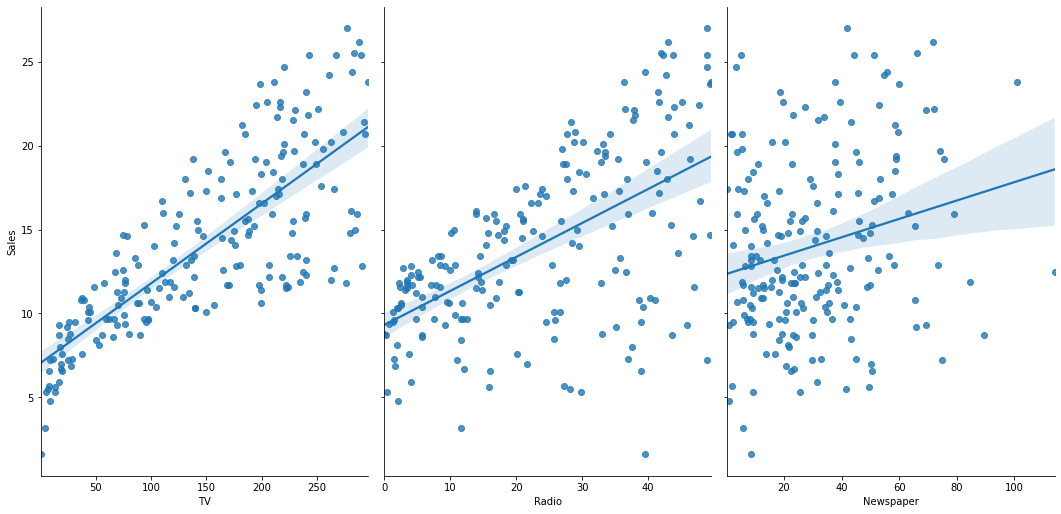

In [9]:
#Lets visualize the relationship our features with respect to our response variable
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

We can see that TV advertising has a linear relationship with sales,
so we can say that as TV advertising increases so does the sales in a somewhat
linear fashion.


Radio advertising has less stronger relationship with sales and
Newspaper has a weak relationship.


In [10]:
#lets extract our feature values
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:
X.shape

(200, 3)

In [12]:
y = data['Sales']

In [13]:
y.shape


(200,)

In [14]:
X_tain, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linreg = LinearRegression()

In [17]:
linreg.fit(X_tain, y_train)

LinearRegression()

In [18]:
linreg.coef_

array([0.04656457, 0.17915812, 0.00345046])

In [19]:
linreg.intercept_

2.87696662231793

In [20]:
values = zip(feature_cols, linreg.coef_)

In [21]:
values

Now lets write our hypothesis for prediction:

Y =  2.88 + (0.045 * TV Advertising) + (0.18 * Radio Advertising) + (0.0034 * NewsPaper Advertising)


In [22]:
#Lets make predictions!
y_pred =  linreg.predict(X_test)

In [23]:
from sklearn import metrics

In [24]:
import  numpy as np


In [26]:
np.sqrt(metrics.mean_squared_error( y_test, y_pred))

1.404651423032895

1.4 indicates that our model does well but the question is, could we improve it?
In other words, can we lower our RMSE?

Since linear regression does not have any hyper parameters to tune, we will focus on
feature selection to see if we can improve our model.

As we remember, news paper variable had  a  very weak relationship with our response.
Would removing it improve our mode accuracy? Lets give it a try!


## New model selection with less features

In [27]:
new_cols = ['TV', 'Radio']

In [28]:
X = data[new_cols]
y = data['Sales']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [31]:
linreg.fit(X,y)

LinearRegression()

In [32]:
linreg.coef_

array([0.04575482, 0.18799423])

In [33]:
linreg.intercept_

2.921099912405138

In [34]:
y_pred = linreg.predict(X_test)

In [37]:
#Now lets calculate the RMSE

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.347495815483983

We can see that our model is improving better without the News Paper feature
indicating that we can leave this feature out of our model!

